In [1]:
import numpy as np
import sys
from matplotlib import pyplot as plt
import SimpleITK as sitk

sys.path.append("../../")
from scripts.segmentation_metrics import precision, recall, dice

from save_utils import draw_mask
%load_ext autoreload
%autoreload 2

In [2]:
img_files = ['./data/img_{}.nii.gz'.format(i) for i in range(10)]
model_name =  "full_vessel"
GT_files = ['./data/full-vessel/GT_{}.nrrd'.format(i) for i in range(10)]
pred_files = ['./data/full-vessel/prediction_{}.seg.nrrd'.format(i) for i in range(10)]

# img_files = ['./data/img_{}.nii.gz'.format(i) for i in range(1)]
# model_name = 'branching_point'
# GT_files = ['./data/branching-point/Branching_GT_{}.nrrd'.format(i) for i in range(10)]
# pred_files = ['./data/branching-point/Branching_prediction_{}.nrrd'.format(i) for i in range(10)]

results = {'Dice':[],'Precision':[],'Recall':[]}

for img, gt, pred in zip(img_files,GT_files,pred_files):

    img = sitk.ReadImage(img)
    img = sitk.GetArrayFromImage(img)


    gt =  sitk.ReadImage(gt)
    gt = sitk.GetArrayFromImage(gt)




    pred = sitk.ReadImage(pred)
    pred = sitk.GetArrayFromImage(pred)



    dsc = []
    prec = []
    rec = []
    for i in range(len(pred)):
        if np.sum(gt[i])>0:
        # if True:
            dsc.append(dice(pred[i],gt[i]))
            prec.append(precision(pred[i],gt[i]))
            rec.append(recall(pred[i],gt[i]))

  
    results['Dice'].append(dsc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)



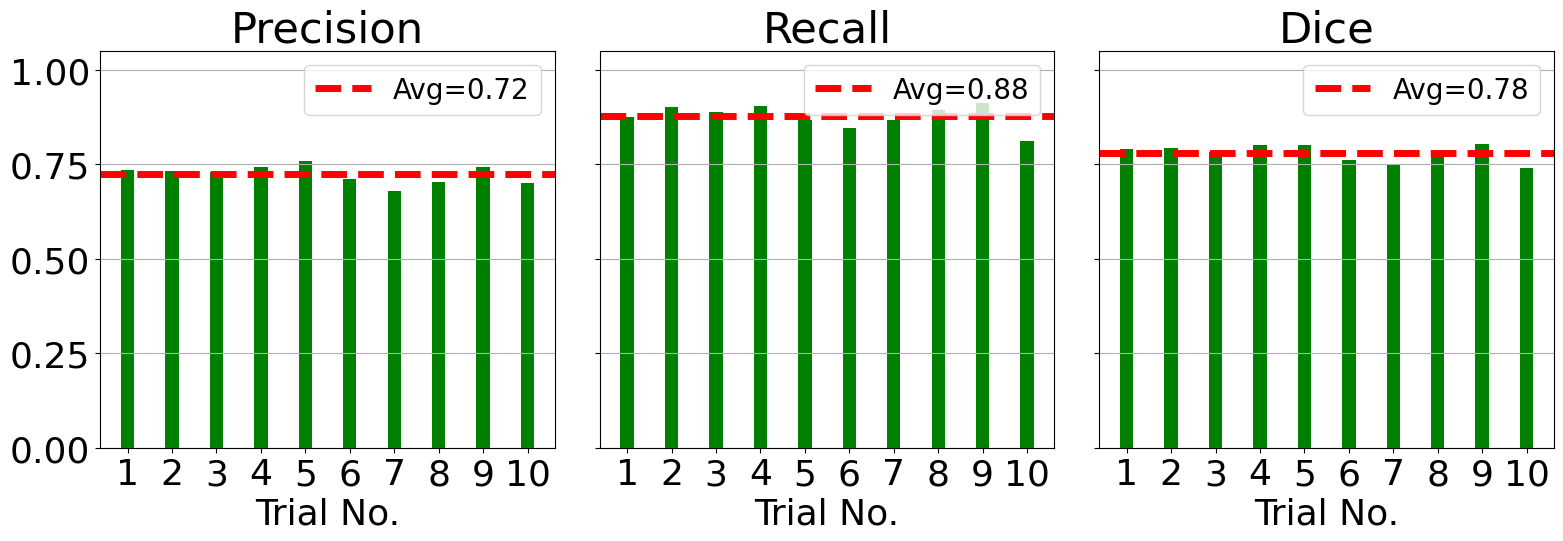

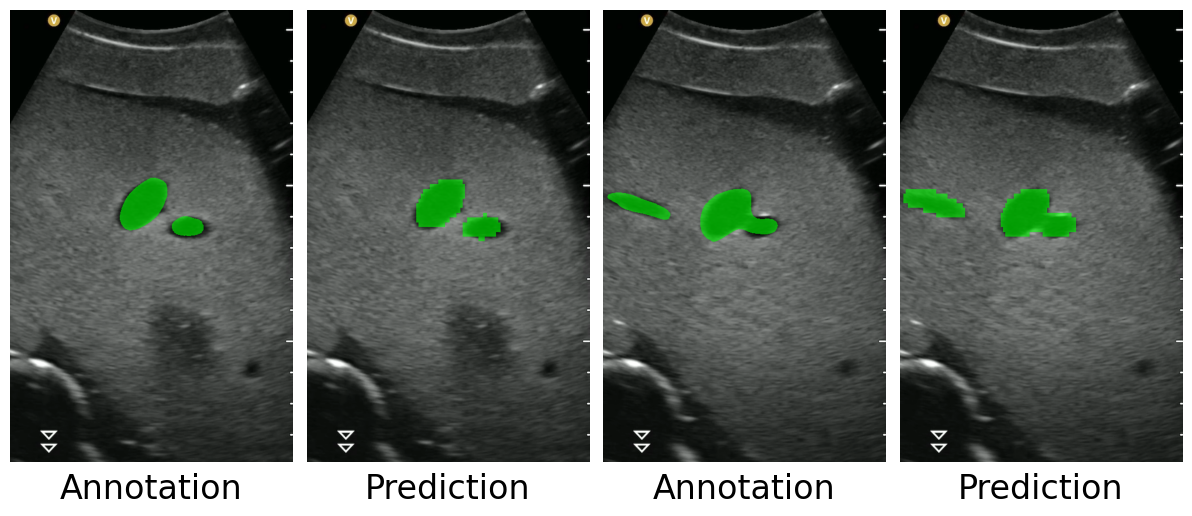

In [213]:

metric_name = ['Precision','Recall','Dice']

theme_color = {'full_vessel':'green','branching_point':'green'}

plt.rc('font',size=26)
fig,axes = plt.subplots(1,3,figsize=(16,6),sharey=True)
legend_plot = 1
for i,met in enumerate(metric_name):
    ax = axes[i]

    data = [np.mean(d) for d in results[met]]

    width = 0.3

    ax.bar(np.arange(1,len(data)+1), data,width,color=theme_color[model_name])
    ax.axhline(np.mean(data),ls='--',c='red',label = 'Avg={:.2f}'.format(np.mean(data)),lw=5)
    ax.set_xticks(np.arange(1,len(data)+1))
    ax.yaxis.grid()
    ax.set_title(met)
    
    ax.set_xlabel('Trial No.')
    ax.legend(fontsize=20)
    ax.set_ylim((0,1.05))
    
plt.tight_layout()

plt.savefig('./figures/{}_metric.png'.format(model_name))
plt.show()
trial = 0
fr1 = 30
fr2 = 35
title_y_loc = -0.1

img, gt, pred  = img_files[trial],GT_files[trial],pred_files[trial]

img = sitk.ReadImage(img)
img = sitk.GetArrayFromImage(img)


gt =  sitk.ReadImage(gt)
gt = sitk.GetArrayFromImage(gt)




pred = sitk.ReadImage(pred)
pred = sitk.GetArrayFromImage(pred)

plt.rc('font',size=20)

plt.figure(figsize=(12,5.5))

plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(draw_mask(img[fr1],gt[fr1],color = theme_color[model_name])[100:900])
plt.title('Annotation',y=title_y_loc)

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(draw_mask(img[fr1],pred[fr1],color = theme_color[model_name])[100:900])
plt.title('Prediction',y=title_y_loc)

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(draw_mask(img[fr2],gt[fr2],color = theme_color[model_name])[100:900])
plt.title('Annotation',y=title_y_loc)

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(draw_mask(img[fr2],pred[fr2],color = theme_color[model_name])[100:900])
plt.title('Prediction',y=title_y_loc)


plt.tight_layout(pad=0.5)
plt.savefig('./figures/{}_seg.png'.format(model_name))
plt.show()